In [35]:
import pandas as pd
from config import apikey as api_key
import requests
import json
from pathlib import Path
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
file = Path('clean_re_data.csv')
data = pd.read_csv(file)

In [3]:
df = pd.DataFrame(data)
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year
0,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
1,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
2,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
3,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
4,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012


In [4]:
df= df.loc[(df['bed'] >=3) & (df['bed'] <=4)]
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year
2,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
3,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
4,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012
5,for_sale,199999.0,3.0,2.0,1.76,"88 South St, Agawam, MA, 01001",88 South St,Agawam,Massachusetts,1001.0,1968.0,2008-09-19,2008
6,for_sale,419000.0,4.0,2.0,2.00,"57 Amherst Rd, Pelham, MA, 01002",57 Amherst Rd,Pelham,Massachusetts,1002.0,1607.0,2005-07-25,2005


In [5]:
df.value_counts('city')

city
Staten Island    388
Brooklyn         173
Waterbury        135
Bridgeport       123
Milford          113
                ... 
Hopedale           1
Shapleigh          1
Huguenot           1
Huntington         1
Gardiner           1
Length: 1252, dtype: int64

In [6]:
cities = ['Bushkill', 'Waterbury', 'Wilmington','Cranston']


In [7]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city_data =[]

In [10]:
# loop through all the cities in our list to fetch weather data
for i, city in enumerate(df['city']):
        
   

    # Create endpoint URL with each city
    city_url = f'{base_url}appid={api_key}&q={city}&units=Imperial'
    
    try:
        response= requests.get(city_url).json()
        
        # Parse the JSON and retrieve data
#       done above
        city_weather = response 
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_min_temp = city_weather['main']['temp_min']
        city_feels_like = city_weather['main']['feels_like']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

#         Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Min Temp": city_min_temp,
                            "Feels Like": city_feels_like,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          10085
Lat           10085
Lng           10085
Max Temp      10085
Min Temp      10085
Feels Like    10085
Humidity      10085
Cloudiness    10085
Wind Speed    10085
Country       10085
Date          10085
dtype: int64

In [16]:
city_data_df = city_data_df.rename(columns={"City":"city"})
city_data_df.head()
                                   

,city,Lat,Lng,Max Temp,Min Temp,Feels Like,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bushkill,41.0934,-75.0018,78.62,70.86,75.34,64,33,7.29,US,1690844771
1,Waterbury,41.5582,-73.0515,78.39,68.50,73.17,65,40,4.61,US,1690844502
2,Wilmington,34.2257,-77.9447,82.99,77.95,85.68,75,0,6.91,US,1690844554
3,Cranston,41.7798,-71.4373,77.22,72.10,75.13,60,100,11.50,US,1690844631
4,Saint Thomas,13.1833,-59.5833,79.92,79.92,79.92,89,20,8.05,BB,1690844960


In [17]:
merge_df = pd.merge(df, city_data_df, on="city")

In [18]:
merge_df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,...,Lat,Lng,Max Temp,Min Temp,Feels Like,Humidity,Cloudiness,Wind Speed,Country,Date
0,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,...,13.1833,-59.5833,79.92,79.92,79.92,89,20,8.05,BB,1690844960
1,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,...,42.0695,-72.6148,75.61,69.19,72.86,65,100,8.05,US,1690844961
2,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,...,42.0695,-72.6148,75.61,69.19,72.86,65,100,8.05,US,1690844961
3,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,...,42.0695,-72.6148,75.61,69.19,72.86,65,100,8.05,US,1690844961
4,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,...,42.0695,-72.6148,75.61,69.19,72.86,65,100,8.05,US,1690844961


In [25]:
# create easiliy callable variables
price = merge_df['price']
max_temp = merge_df['Max Temp']
min_temp = merge_df['Min Temp']
feels_like = merge_df['Feels Like']
cloudiness = merge_df['Cloudiness']
humidity = merge_df['Humidity']


In [36]:
correlation = st.pearsonr(max_temp,price)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.15


In [37]:
correlation = st.pearsonr(feels_like,price)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.15


In [38]:
correlation = st.pearsonr(cloudiness,price)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.16


In [39]:
correlation = st.pearsonr(humidity,price)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.2


In [40]:
correlation = st.pearsonr(min_temp,price)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.15


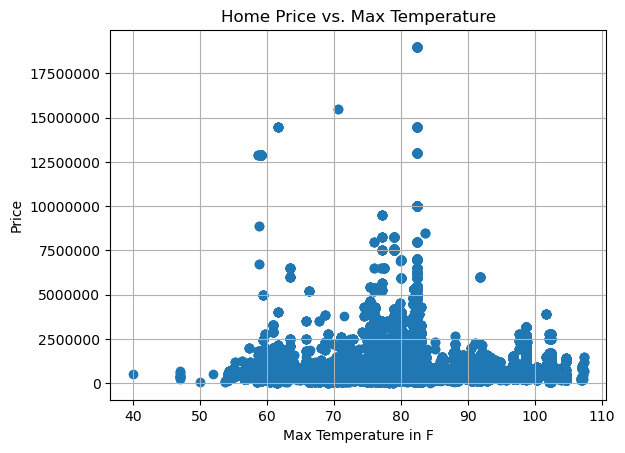

In [62]:
plt.scatter(max_temp, price)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Home Price vs. Max Temperature' )
plt.grid(True)
plt.xlabel('Max Temperature in F')
plt.ylabel('Price')
plt.ticklabel_format(style = 'plain')
plt.savefig("MaxTemp v Home Price.png")
plt.show()

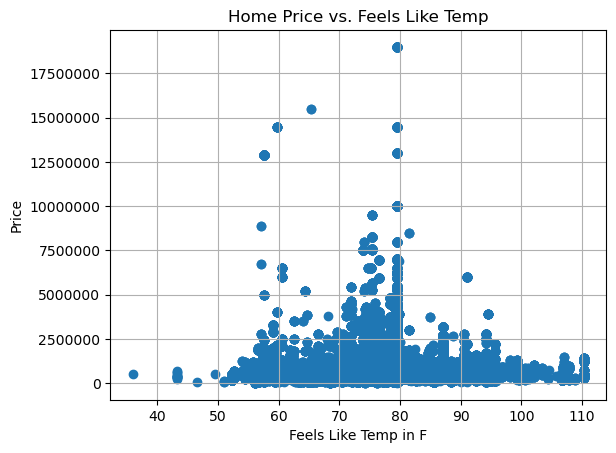

In [41]:
plt.scatter(feels_like, price)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Home Price vs. Feels Like Temp' )
plt.grid(True)
plt.xlabel('Feels Like Temp in F')
plt.ylabel('Price')
plt.ticklabel_format(style = 'plain')
plt.show()

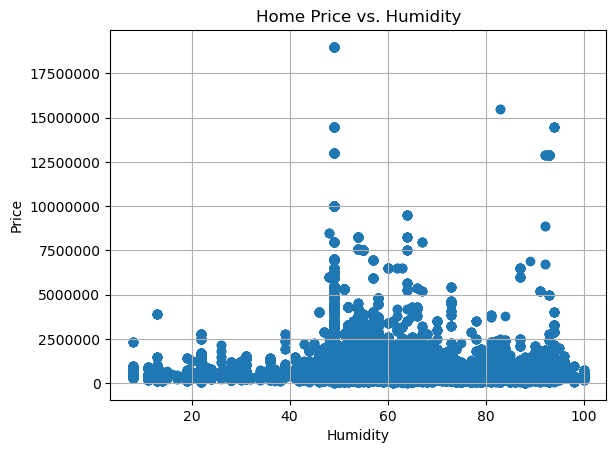

In [42]:
plt.scatter(humidity, price)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Home Price vs. Humidity' )
plt.grid(True)
plt.xlabel('Humidity')
plt.ylabel('Price')
plt.ticklabel_format(style = 'plain')
plt.show()

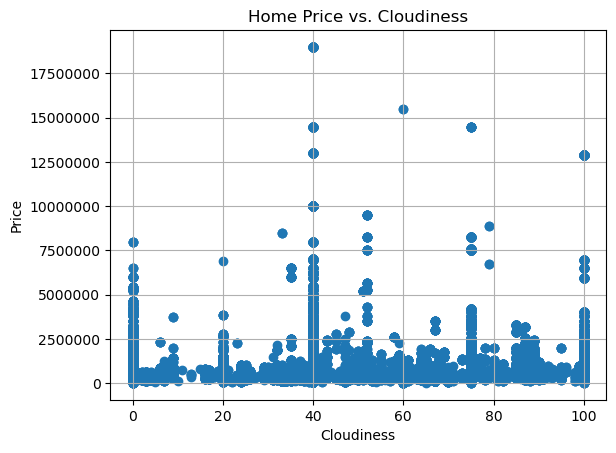

In [43]:
plt.scatter(cloudiness, price)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Home Price vs. Cloudiness' )
plt.grid(True)
plt.xlabel('Cloudiness')
plt.ylabel('Price')
plt.ticklabel_format(style = 'plain')
plt.show()

In [55]:
max_temp_df = merge_df.groupby(['Max Temp'], as_index=False).mean('price')
max_temp_df

,Max Temp,price,bed,bath,acre_lot,zip_code,house_size,year,Lat,Lng,Min Temp,Feels Like,Humidity,Cloudiness,Wind Speed,Date
0,40.01,4.990000e+05,3.000000,2.000000,0.340000,2769.000000,1812.000000,2003.000000,-23.3167,17.0833,40.01,35.96,27.0,0.0,5.73,1.690845e+09
1,47.07,4.228750e+05,3.500000,2.666667,1.255833,6055.750000,2116.750000,2010.833333,-41.6667,173.5000,47.07,43.27,53.0,29.0,7.83,1.690846e+09
2,50.00,7.999900e+04,3.000000,2.000000,7.100000,12746.000000,1216.000000,2003.000000,-33.7286,18.9803,43.97,46.53,80.0,5.0,5.57,1.690846e+09
3,52.02,5.100000e+05,4.000000,3.000000,9.160000,4401.000000,3517.000000,2008.000000,-37.4167,145.4167,48.58,49.51,95.0,19.0,1.99,1.690846e+09
4,53.83,9.195000e+04,3.000000,1.500000,0.375000,5907.000000,858.500000,2016.000000,-17.8833,30.7000,53.83,50.99,44.0,22.0,6.58,1.690846e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,104.63,2.690400e+05,3.320000,2.120000,0.508400,8004.000000,1670.320000,2012.440000,31.4799,-97.2453,101.79,106.75,28.0,0.0,10.36,1.690846e+09
748,106.86,2.143333e+05,3.333333,2.000000,4.990000,12809.000000,2078.000000,2012.000000,33.1212,-97.1834,101.10,108.88,30.0,0.0,13.80,1.690846e+09
749,107.06,5.786498e+05,3.333333,2.166667,0.590000,3862.666667,1713.666667,2012.333333,32.7357,-97.1081,101.71,107.89,28.0,0.0,12.66,1.690845e+09
750,107.19,3.625000e+05,4.000000,3.500000,0.750000,18343.000000,2653.500000,2009.500000,33.0485,-96.1094,100.42,101.28,17.0,45.0,10.42,1.690846e+09


In [57]:
x_axis = max_temp_df['Max Temp']
y_axis = max_temp_df['price']


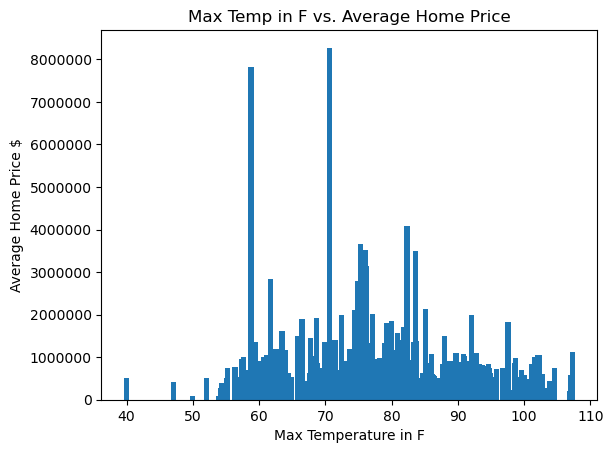

In [63]:
plt.bar(x_axis, y_axis)
plt.ticklabel_format(style = 'plain')
plt.title('Max Temp in F vs. Average Home Price' )
plt.xlabel('Max Temperature in F')
plt.ylabel('Average Home Price $')
plt.savefig("MaxTemp v Mean Home Price.png")
plt.show()